# Ford Bay Wheels Data for May 2020
## by Maciej Socha

## Investigation Overview

I have analyzed BayWheels Dataset with main focus on rent counts, durations and overview on which days and hours there was most bikes rented and how long.

## Dataset Overview

Dataset analyzed focused of May 2020 data from BayWheels GoBike, consists of over 130 000 records and none were removed in process of analization for purpose to be as specific as possible.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('baywheels_final.csv')

## Members vs Casual renters

In May 2020 only 38.9% of rents were done by registered Members of GoBike user base. There has to be strong marketing push for Casual renters to register and Members base should grow.

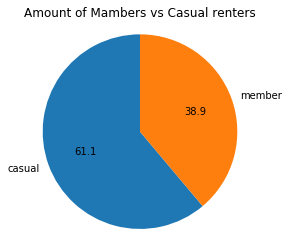

In [5]:
mem_cas = df['member_casual'].value_counts()
plt.pie(mem_cas, labels = mem_cas.index, startangle = 90, autopct='%.1f')
plt.axis('square')
plt.title('Amount of Mambers vs Casual renters');

## Rent lenght and count per customer 

Rents shorter than 1 hours account for over 90% of overall rents. Members tends to prefer shorter rents which allows more bikes to be circulating. 

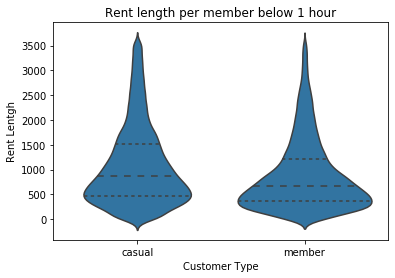

In [7]:
sb.violinplot(data = df.query("time_diff_seconds < 3600"), x = 'member_casual', y = 'time_diff_seconds', color = sb.color_palette()[0],inner='quartile')
plt.title('Rent length per member below 1 hour')
plt.xlabel("Customer Type")
plt.ylabel("Rent Lentgh");

In [9]:
data_to_analyse = df.query("time_diff_seconds <= 3600")

## Rent count per hour of day

Most of the rents are done between 15 - 18. Obviously, night is least popular hours to rent a bike. Night hours are the best for maintenance jobs and restocking of stations. There is also possibility to promote those hours by marketing actions.

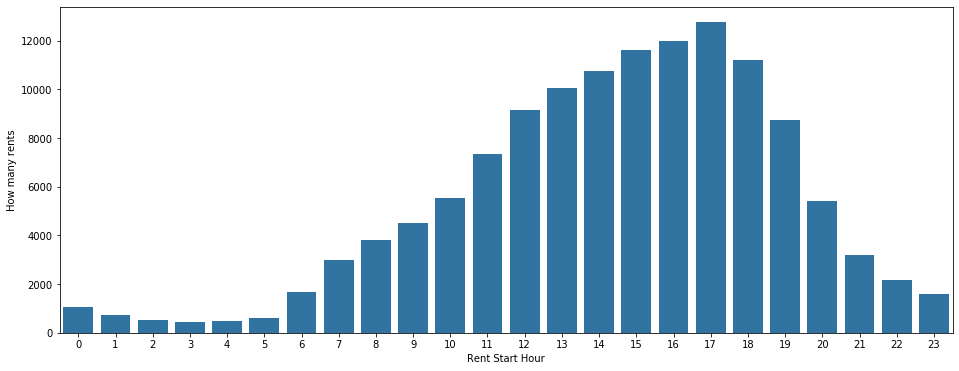

In [11]:
plt.figure(figsize=[16, 6])
sb.countplot(data = data_to_analyse, x='start_hour', color = sb.color_palette()[0]);

plt.xlabel('Rent Start Hour');
plt.ylabel('How many rents');

In [17]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_cat = pd.api.types.CategoricalDtype(ordered=True, categories = days)

df['start_day'] = df['start_day'].astype(days_cat)
data_to_analyse = df.query("time_diff_seconds <= 3600")


## Times, hours of the rent by Customer type

Registered users are more consistent with their rents. This shows trends that bikes would be more evenily used if more Casual users registered. Next slide confirms previous statment that most popular times are between 15-18 but in addition shows how much more active are Members instead of Casual users. 


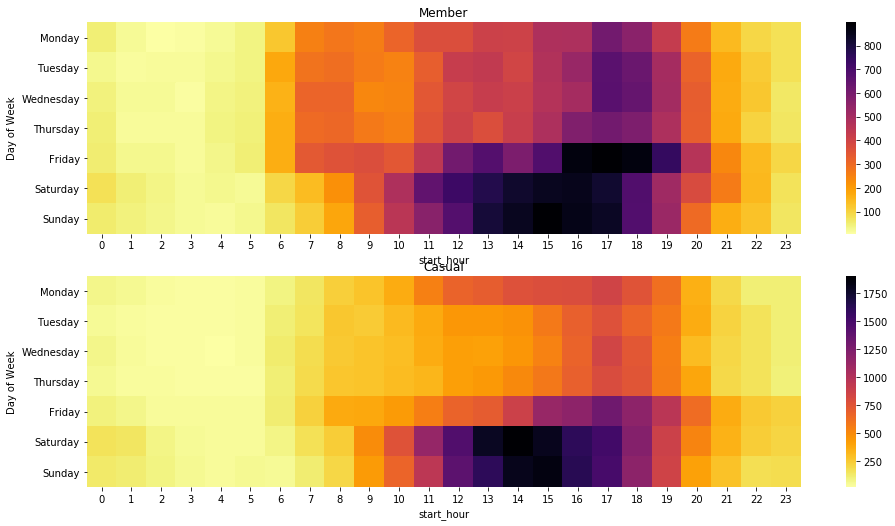

In [20]:
plt.figure(figsize=[16, 6])

plt.subplot(2, 1, 1)
member = data_to_analyse.query('member_casual == "member"')
member_count = member.groupby(['start_day', 'start_hour']).size()
member_count = member_count.reset_index(name='count')
member_count = member_count.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(member_count, cmap='inferno_r')
plt.title('Member')
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
plt.subplots_adjust(top = 1.2)
casual = data_to_analyse.query('member_casual == "casual"')
casual_count = casual.groupby(['start_day', 'start_hour']).size()
casual_count = casual_count.reset_index(name='count')
casual_count = casual_count.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(casual_count, cmap='inferno_r')
plt.title('Casual')
plt.ylabel('Day of Week');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!